### About the dataset
Housing dataset contains the information of the properties sold in the city of "Nashville" over a sapn of 40 years. It contains all the necessary information like the area of the property, amount it was sold for, number of rooms that the property has etc. Our aim is to find some interesting insights from the data.

### Loading data
1. Import the "housing" data using appropriate functions.


### Cleaning data
1. Replace the missing values with appropriate approximations
2. Rename the columns to better suited names
3. Extract the month and year from the sale date.
4. Extract the pin number from the property address


### EDA
Use appropriate plots and functions to answer the following questions.

1. How has the price of properties changed over the years
2. Does a specific month or span of months have the highest property prices?
3. For what purpose were the properties generally purchased?
4. What is the average age of the properties?
5. Have the age of houses affected the price?
6. Have the number of rooms in the house affected the price?
7. Does the size of the property (no. of acres) have any influence in its price?
8. Are houses located in specific pin numbers expensive over the others?
9. How have house prices changed in the 21st centuary as supposed to 20th centuary. 

**IMPORTING LIBRARIES**

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set(color_codes=True)

**LOADING DATA**

In order to load the data, we will use the pandas library and particularly the 'read_excel' method.

In [93]:
data = pd.read_excel('Housing.xlsx')
data.head()

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


**CLEANING DATA**

The major goal of cleaning data is to ensure that all the null values are either eliminated or replaced so as to ensure that the data is fit for analysis. 

In [94]:
data.isnull().sum()

UniqueID               0
LandUse                0
PropertyAddress       29
SaleDate               0
SalePrice              0
Acre               30462
LandValue          30462
BuildingValue      30462
TotalValue         30462
YearBuilt          32314
Bedrooms           32320
FullBath           32202
HalfBath           32333
dtype: int64

**1. Replace the missing values with appropriate approximations**

Here we are filling all of the null values, with the mean value of their corresponding columns. 

In [95]:
data['Acre']=data["Acre"].fillna(np.mean(data["Acre"]))
data['LandValue']=data["LandValue"].fillna(np.mean(data["LandValue"]))
data['BuildingValue']=data["BuildingValue"].fillna(np.mean(data["BuildingValue"]))
data['TotalValue']=data["TotalValue"].fillna(np.mean(data["TotalValue"]))
data['YearBuilt']=data["YearBuilt"].fillna(np.mean(data["YearBuilt"]))
data['Bedrooms']=data["Bedrooms"].fillna(np.mean(data["Bedrooms"]))
data['FullBath']=data["FullBath"].fillna(np.mean(data["FullBath"]))
data['HalfBath']=data["HalfBath"].fillna(np.mean(data["HalfBath"]))
data

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000
1,16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000
2,54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000
3,43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000
4,22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
56473,27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
56474,52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
56475,54042,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921


**2. Rename the columns to better suited names**

Most of the columns are aptly named, maybe except for 'FullBath' and 'HalfBath'. So, we can rename them using the 'rename()' method.

In [96]:
data.columns

Index(['UniqueID ', 'LandUse', 'PropertyAddress', 'SaleDate', 'SalePrice',
       'Acre', 'LandValue', 'BuildingValue', 'TotalValue', 'YearBuilt',
       'Bedrooms', 'FullBath', 'HalfBath'],
      dtype='object')

In [97]:
data.rename(columns={"FullBath":"FullBathroom"},inplace=True)
data.rename(columns={"HalfBath":"HalfBathroom"},inplace=True)

**3. Extract the month and year from the sale date.**

We can use the 'DatetimeIndex' method in pandas to extract the year, month and day of any given date.

In [98]:
data['Year']=pd.DatetimeIndex(data['SaleDate']).year
data['Month']=pd.DatetimeIndex(data['SaleDate']).month
data['Day']=pd.DatetimeIndex(data['SaleDate']).day
data

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day
0,2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9
1,16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10
2,54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26
3,43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29
4,22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27
56473,27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2
56474,52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16
56475,54042,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,9,7


**4. Extract the pin number from the property address**

In [99]:
data['Pin'] = data['PropertyAddress'].str[:4]
data['Pin']

0        1808
1        1832
2        1864
3        1853
4        1829
         ... 
56472    1435
56473    1423
56474    1804
56475    1709
56476    1713
Name: Pin, Length: 56477, dtype: object

**EXPLORATORY DATA ANALYSIS**

**1. How has the price of properties changed over the years**

In [100]:
sales_grouped_data = data.groupby('Year')['SalePrice'].count()
sales_grouped_data

Year
2013    11292
2014    14283
2015    16829
2016    14071
2019        2
Name: SalePrice, dtype: int64

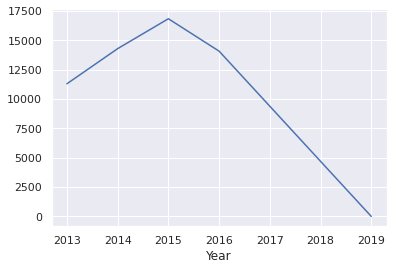

In [101]:
sns.lineplot(x=sales_grouped_data.index, y =sales_grouped_data.values)


As the above line plot clearly suggests, the sale prices of houses peaked around the year 2015, and ever since have rapidly declined. 

**2. Does a specific month or span of months have the highest property prices?**
 

In [102]:
month_grouped_data = data.groupby('Month')['SalePrice'].sum()
month_grouped_data

Month
1     2155382094
2      683643350
3     1191059922
4     1569431847
5     1765649668
6     1978451943
7     1758217830
8     1800308075
9     1672552371
10    1329782558
11    1044454378
12    1531829638
Name: SalePrice, dtype: int64

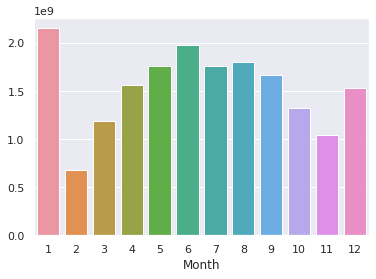

In [103]:
sns.barplot(x=month_grouped_data.index,y=month_grouped_data.values)

From the above barplot, we can make out that the sales are at their peak in January, and around the middle of the year in June, albeit slightly less. 

**3. For what purpose were the properties generally purchased?**


In [104]:
data['LandUse'].unique()

array(['SINGLE FAMILY', 'RESIDENTIAL CONDO', 'VACANT RURAL LAND',
       'VACANT RES LAND', 'DUPLEX', 'VACANT RESIDENTIAL LAND', 'CHURCH',
       'ZERO LOT LINE', 'RESIDENTIAL COMBO/MISC', 'PARSONAGE',
       'OFFICE BLDG (ONE OR TWO STORIES)',
       'GREENBELT/RES_x000D_\nGRRENBELT/RES', 'MOBILE HOME',
       'PARKING LOT', 'CLUB/UNION HALL/LODGE', 'TRIPLEX',
       'VACANT ZONED MULTI FAMILY', 'SPLIT CLASS', 'CONDO', 'QUADPLEX',
       'LIGHT MANUFACTURING', 'FOREST', 'CONVENIENCE MARKET WITHOUT GAS',
       'DORMITORY/BOARDING HOUSE', 'GREENBELT', 'DAY CARE CENTER',
       'METRO OTHER THAN OFC, SCHOOL,HOSP, OR PARK',
       'TERMINAL/DISTRIBUTION WAREHOUSE', 'NIGHTCLUB/LOUNGE',
       'RESTURANT/CAFETERIA', 'VACANT COMMERCIAL LAND',
       'CONDOMINIUM OFC  OR OTHER COM CONDO', 'STRIP SHOPPING CENTER',
       'VACANT RESIENTIAL LAND', 'APARTMENT: LOW RISE (BUILT SINCE 1960)',
       'ONE STORY GENERAL RETAIL STORE', 'NON-PROFIT CHARITABLE SERVICE',
       'SMALL SERVICE SHOP', 'MO

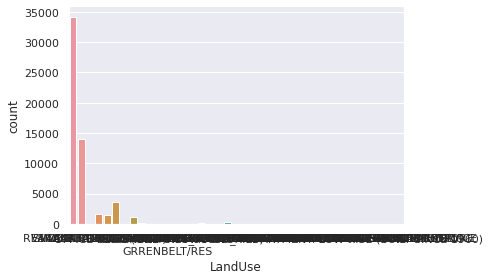

In [105]:
sns.countplot(x='LandUse', data = data)

In [106]:
purpose_grouped_data = data.groupby('LandUse')['LandUse'].count()
purpose_grouped_data.sort_values(ascending = False)

LandUse
SINGLE FAMILY                                 34197
RESIDENTIAL CONDO                             14080
VACANT RESIDENTIAL LAND                        3547
VACANT RES LAND                                1549
DUPLEX                                         1373
ZERO LOT LINE                                  1048
CONDO                                           247
RESIDENTIAL COMBO/MISC                           95
TRIPLEX                                          92
QUADPLEX                                         39
CONDOMINIUM OFC  OR OTHER COM CONDO              35
CHURCH                                           34
MOBILE HOME                                      20
DORMITORY/BOARDING HOUSE                         19
VACANT COMMERCIAL LAND                           17
SPLIT CLASS                                      17
PARKING LOT                                      11
GREENBELT                                        10
FOREST                                           10
PARS

Clearly, from the above arrangement 'SINGLE FAMILY' and 'RESIDENTIAL CONDO' were the major reasons for the purchase of houses.

**4. What is the average age of the properties?**





In [107]:
math.trunc(data['YearBuilt'].mean())

1963

In [108]:
data['YearBuilt'].max()

2017.0

**5. Have the age of houses affected the price?**


In [109]:
data.head()

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin
0,2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,2013,4,9,1808
1,16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,2014,6,10,1832
2,54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,2016,9,26,1864
3,43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,2016,1,29,1853
4,22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,2014,10,10,1829


In [110]:
age_grouped_data = data.groupby('YearBuilt')['SalePrice'].sum()
age_grouped_data

YearBuilt
1799.0       500000
1832.0      1550000
1870.0      1134900
1880.0        80000
1890.0       617500
            ...    
2013.0    119982160
2014.0    189258629
2015.0    280238488
2016.0    217806395
2017.0      5456548
Name: SalePrice, Length: 127, dtype: int64

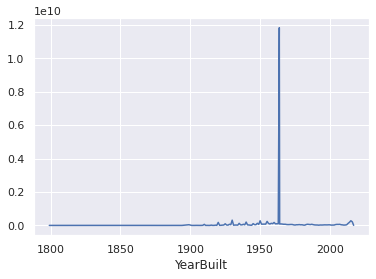

In [111]:
sns.lineplot(x=age_grouped_data.index, y=age_grouped_data.values)

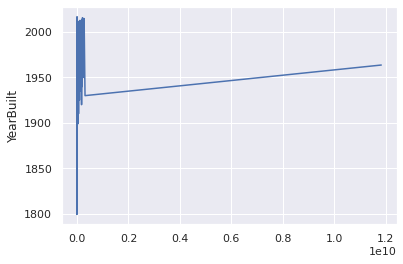

In [112]:
sns.lineplot(y=age_grouped_data.index, x=age_grouped_data.values)

From the above charts it definitely seems that the houses built during between 1950 and 1960 have peaked a lot. The peak is very high compared to other years, but there isn't any continuing trend to showcase that age has always affected the strength. 

**6. Have the number of rooms in the house affected the price?**


In [113]:
data['TotalRooms'] = data['Bedrooms'] + data['FullBathroom'] + data['HalfBathroom']
data['TotalRooms']

0        6.000000
1        8.000000
2        7.000000
3        6.000000
4        7.000000
           ...   
56472    5.259848
56473    5.259848
56474    5.259848
56475    5.259848
56476    5.259848
Name: TotalRooms, Length: 56477, dtype: float64

In [114]:
rooms_grouped_data = data.groupby('TotalRooms')['SalePrice'].sum()
rooms_grouped_data

TotalRooms
0.000000        19801900
1.000000         2314900
2.000000        14529298
3.000000       530095852
3.089912        67122950
3.283921          132000
4.000000       751991475
4.283921         1158600
5.000000      1533833898
5.169936           95000
5.259848     11776688834
5.283921         7949500
6.000000      1272162799
6.283921        14557508
7.000000       769327234
7.283921         4509000
8.000000       594821278
8.089912          385000
8.283921         2482000
9.000000       396283084
10.000000      253961196
11.000000      224059044
12.000000      106080135
13.000000       77858139
14.000000       32615094
15.000000        7659456
16.000000        4400000
17.000000        8150000
20.000000        3300000
22.000000        2438500
Name: SalePrice, dtype: int64

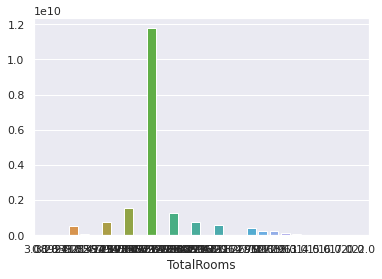

In [115]:
sns.barplot(x = rooms_grouped_data.index, y = rooms_grouped_data.values)

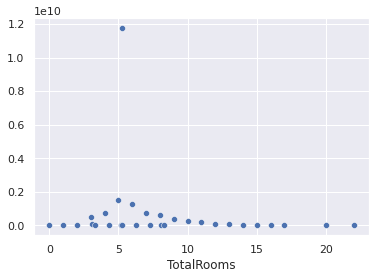

In [116]:
sns.scatterplot(x=rooms_grouped_data.index, y=rooms_grouped_data.values)

In [117]:
math.trunc(data['TotalRooms'].mean())

5

Here, we make an interesting obervation that the sale prices of houses with 5 rooms is the maximum by a large extent. And, in fact, the the number of houses around 5 also show a considerably high sales price. Since, the mean of all of the number of houses is also 5, it's interesting to note that sales prices tend to be high with an average number of rooms in a house. 

**7. Does the size of the property (no. of acres) have any influence in its price?**


In [118]:
property_grouped_data=data.groupby('Acre')['SalePrice'].sum()
property_grouped_data

Acre
0.01        885600
0.02       1588500
0.03      10632500
0.04       1883650
0.05       1899200
            ...   
47.50       499900
51.34       500000
62.96       580000
68.79        78000
160.06     3235790
Name: SalePrice, Length: 520, dtype: int64

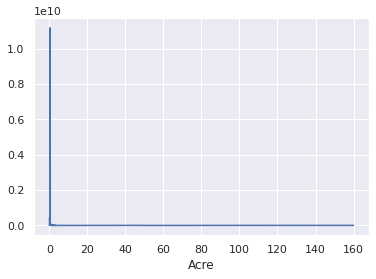

In [119]:
plot = sns.lineplot(x=property_grouped_data.index, y=property_grouped_data.values)

[(0.0, 12.0)]

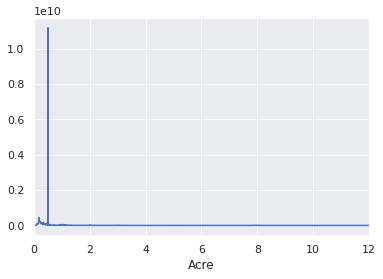

In [120]:
plot = sns.lineplot(x=property_grouped_data.index, y=property_grouped_data.values)
plot.set(xlim=(0,12))

[(0.0, 1.0)]

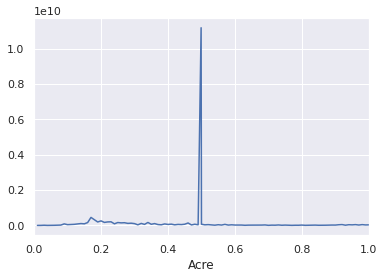

In [121]:
plot = sns.lineplot(x=property_grouped_data.index, y=property_grouped_data.values)
plot.set(xlim=(0,1))

In [122]:
round(data['Acre'].mean(), 2)

0.5

Though there isn't any repeating trend, it is evident from the above line chart that the sale price is at its highest when the size of the property is near or equal to the mean size, that is 0.5



**8. Are houses located in specific pin numbers expensive over the others?**


In [123]:
pin_grouped_data = data.groupby('Pin')['SalePrice'].sum()
pin_grouped_data

Pin
  12    195000
  AC    450000
  HA     19000
  LO    575000
  MA    591800
         ...  
STRA    320000
SUNN    398500
TYNE    315000
WASH    379800
WEST    435000
Name: SalePrice, Length: 6530, dtype: int64

**9. How have house prices changed in the 21st century as supposed to 20th century.**

In [124]:
century = data[data['YearBuilt']>1900]
century1 = century[century['YearBuilt']>=2000]
century0 = century[century['YearBuilt']<2000]

In [125]:
century1

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin,TotalRooms
8,36500,SINGLE FAMILY,"1428 SPRINGFIELD HWY, GOODLETTSVILLE",2015-08-14,285000,1.67,45400.0,176900.0,222300.0,2000.0,3.0,2.0,1.0,2015,8,14,1428,6.0
13,4512,SINGLE FAMILY,"629 GAYLEMORE DR, GOODLETTSVILLE",2013-06-07,189900,1.07,40000.0,203600.0,243600.0,2006.0,4.0,4.0,0.0,2013,6,7,629,8.0
30,13354,SINGLE FAMILY,"1412 SPRINGFIELD HWY, GOODLETTSVILLE",2014-03-18,359900,1.17,40000.0,333300.0,373300.0,2000.0,4.0,4.0,1.0,2014,3,18,1412,9.0
60,8903,VACANT RES LAND,"332 MONCRIEF AVE, GOODLETTSVILLE",2013-10-25,25000,0.39,24000.0,175900.0,199900.0,2014.0,3.0,2.0,0.0,2013,10,25,332,5.0
61,16921,SINGLE FAMILY,"332 MONCRIEF AVE, GOODLETTSVILLE",2014-06-24,219900,0.39,24000.0,175900.0,199900.0,2014.0,3.0,2.0,0.0,2014,6,24,332,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54080,35530,SINGLE FAMILY,"4932 HICKORY WOODS E, ANTIOCH",2015-07-27,163000,0.23,25000.0,123300.0,148300.0,2000.0,3.0,2.0,0.0,2015,7,27,4932,5.0
54083,21899,SINGLE FAMILY,"4480 LAVERGNE COUCHVILLE PIKE, ANTIOCH",2014-09-03,14000,0.31,25000.0,157500.0,182500.0,2015.0,3.0,2.0,1.0,2014,9,3,4480,6.0
54084,21900,SINGLE FAMILY,"4480 LAVERGNE COUCHVILLE PIKE, ANTIOCH",2014-09-24,23000,0.31,25000.0,157500.0,182500.0,2015.0,3.0,2.0,1.0,2014,9,24,4480,6.0
54085,33753,SINGLE FAMILY,"4480 LAVERGNE COUCHVILLE PIKE, ANTIOCH",2015-06-30,219100,0.31,25000.0,157500.0,182500.0,2015.0,3.0,2.0,1.0,2015,6,30,4480,6.0


In [126]:
grouped_data_21 = century1.groupby('YearBuilt')['SalePrice'].sum()
grouped_data_21

YearBuilt
2000.0     34901984
2001.0     18059001
2002.0     20885705
2003.0     21461521
2004.0     49467077
2005.0     61431654
2006.0     58466851
2007.0     65135601
2008.0     40371556
2009.0     32320700
2010.0     19659522
2011.0     24248100
2012.0     39530301
2013.0    119982160
2014.0    189258629
2015.0    280238488
2016.0    217806395
2017.0      5456548
Name: SalePrice, dtype: int64

In [138]:
grouped_data_20 = century0.groupby('YearBuilt')['SalePrice'].count()
grouped_data_20

YearBuilt
1901.0      1
1902.0      2
1903.0      3
1904.0      8
1905.0      9
         ... 
1995.0     84
1996.0     97
1997.0    138
1998.0     87
1999.0    123
Name: SalePrice, Length: 100, dtype: int64

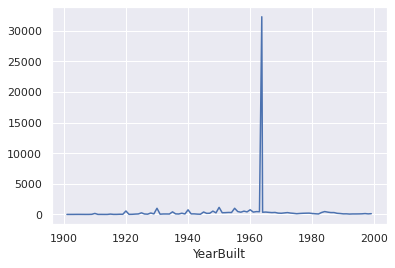

In [139]:
sns.lineplot(x = grouped_data_20.index, y = grouped_data_20.values)

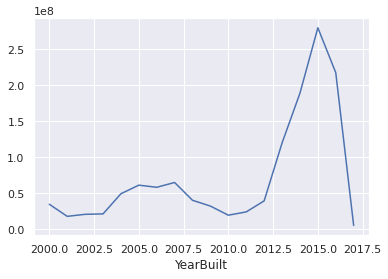

In [132]:
sns.lineplot(x = grouped_data_21.index, y = grouped_data_21.values)

20th Century
The house prices were very low and the graph only even peaks at sometime around 1960. The rest of the prices in other years are very steep and shallow. 

21st Century
There is a significant change in the graphs of the 21st and 20th century, as we can clearly observe that the sale prices have risen with the peak crossing over 2.5 whereas the peak was around 1.2 in 20th century plot. 